In [1]:
options(repr.plot.width=8, repr.plot.height=4)

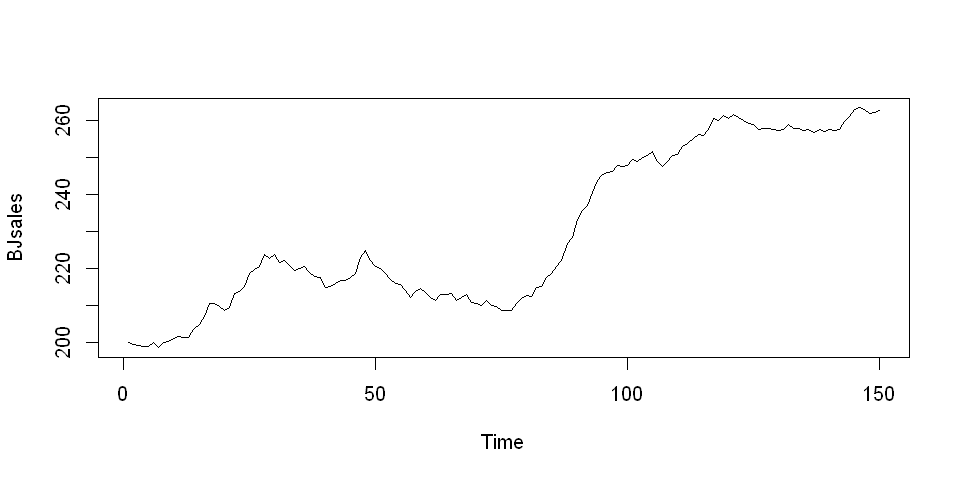

In [2]:
plot(BJsales)

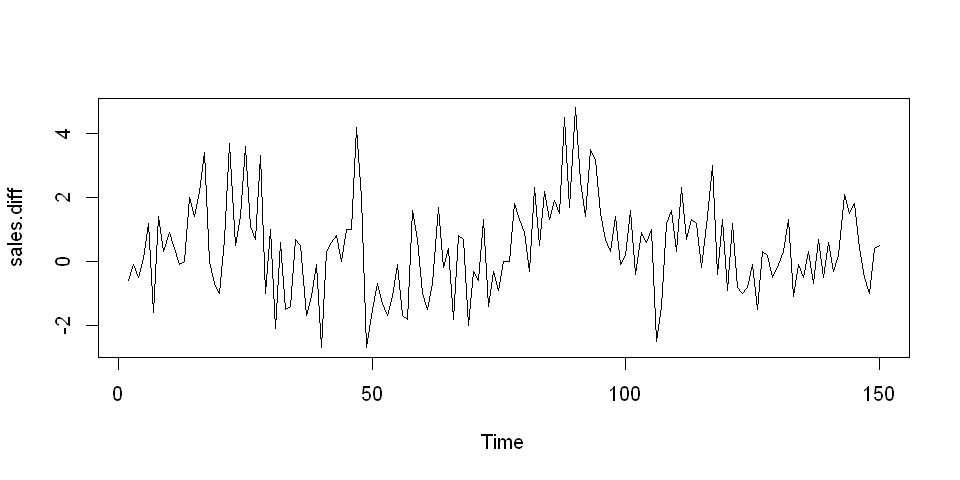

In [3]:
sales.diff <- diff(BJsales)
plot(sales.diff)

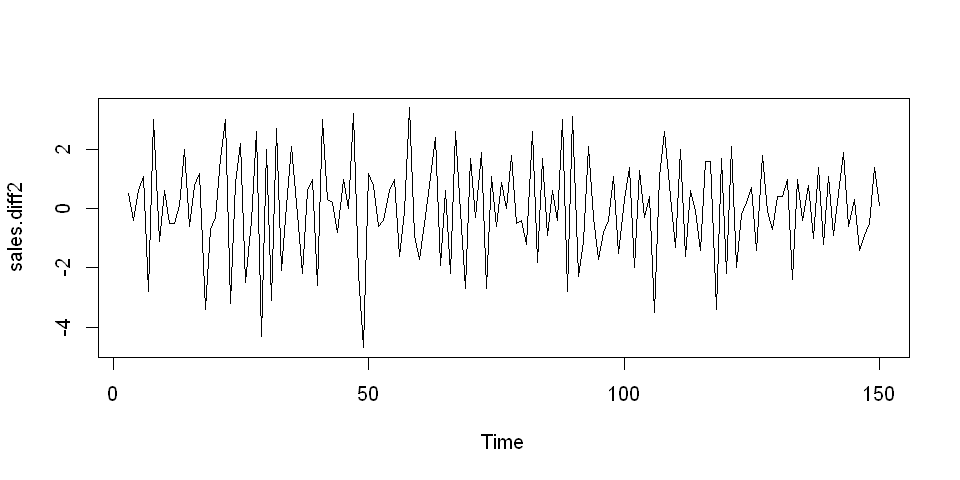

In [4]:
sales.diff2 <- diff(sales.diff)
plot(sales.diff2)

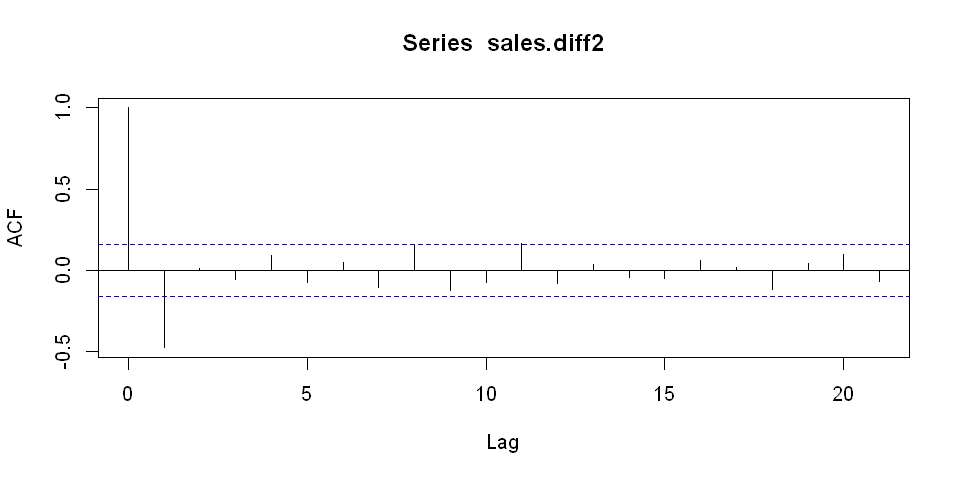

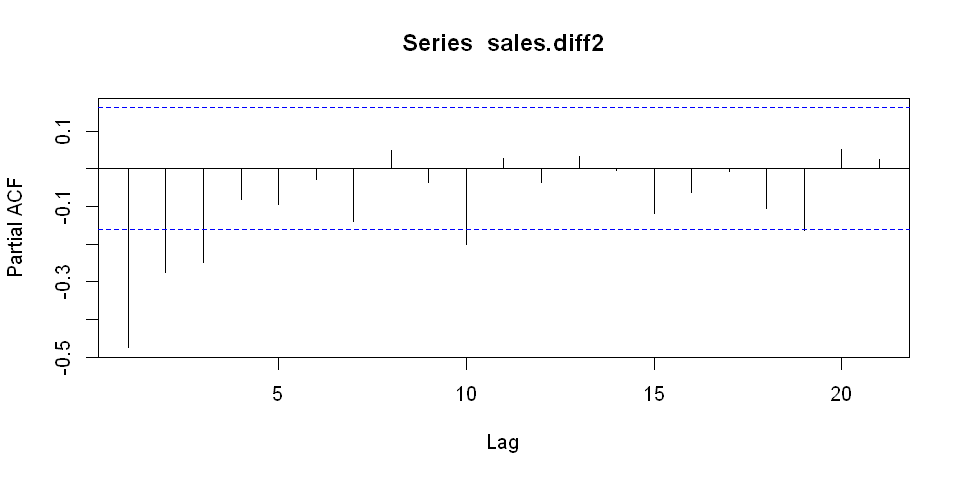

In [5]:
acf(sales.diff2)
pacf(sales.diff2)

In [6]:
params <- list(c(0, 2, 0), c(0, 2, 1), c(1, 2, 0), c(1, 2, 1), c(2, 2, 0), c(2, 2, 1))
results <- data.frame()
for (i in 1:length(params)) {
    param <- params[[i]]
    model <- arima(BJsales, order=param)
    test <- Box.test(model$residuals, lag=log(length(model$residuals)))
    result <- data.frame(model=paste("ARIMA(", param[1], ",", param[2], ",", param[3], ")", sep=""), 
                        AIC=model$aic, SSE=sum(resid(model)^2), P.value=test$p.value)
    results <- rbind(results, result)
}

In [7]:
results

model,AIC,SSE,P.value
"ARIMA(0,2,0)",577.6777,423.7908,7.610494e-07
"ARIMA(0,2,1)",517.1371,276.2293,9.632467e-01
"ARIMA(1,2,0)",541.9646,327.9200,3.606979e-03
"ARIMA(1,2,1)",518.9734,275.8554,9.417760e-01
"ARIMA(2,2,0)",532.2986,302.7467,5.824473e-02
"ARIMA(2,2,1)",520.2684,274.0474,7.955440e-01


Select ARIMA(0,2,1) with minimum AIC value.

In [8]:
model<-arima(BJsales, order=c(0,2,1))
model


Call:
arima(x = BJsales, order = c(0, 2, 1))

Coefficients:
          ma1
      -0.7480
s.e.   0.0662

sigma^2 estimated as 1.866:  log likelihood = -256.57,  aic = 517.14

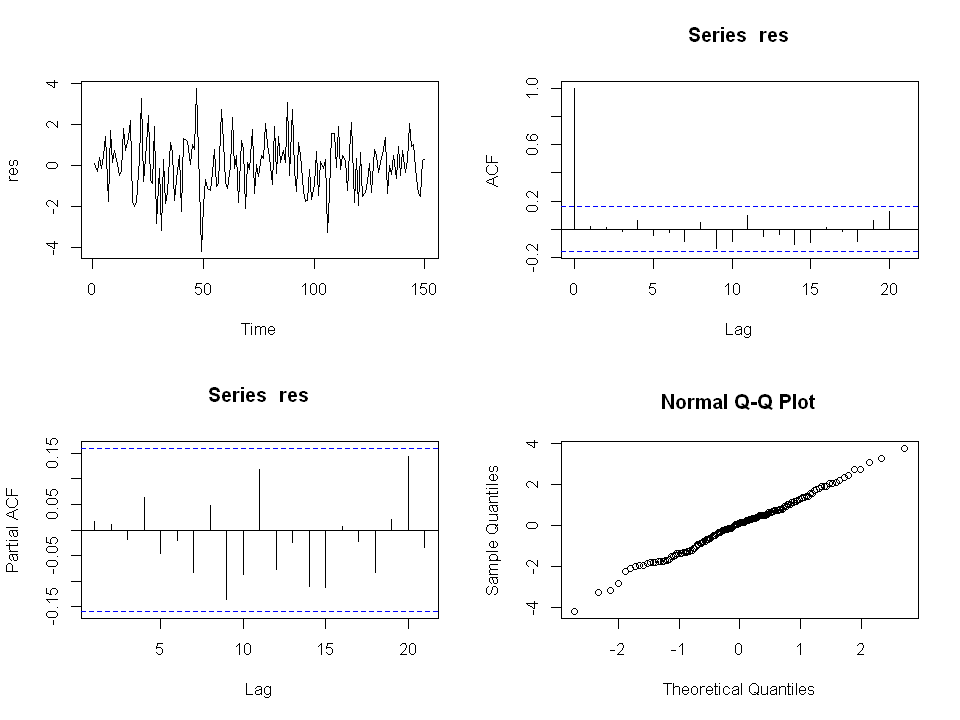

In [9]:
res <- model$residuals
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,2))
plot(res)
acf(res)
pacf(res)
qqnorm(res)

Model: 

$$ Y_t = e_t - 0.7480 e_{t-1}$$

where

$$ Y_t = \nabla^2 X_t $$

Final model:

$$ (1 - B)^2 X_t = e_t - 0.7480 e_{t-1} $$

$$ X_t = 2X_{t-1} - X_{t-2} + e_t - 0.7480 e_{t-1} $$